In [2]:
import sys
sys.path.append('..')

In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the latest version
path = kagglehub.dataset_download(
  "ankushpanday1/lung-cancer-risk-and-prediction-dataset",
)

df = pd.read_csv(path + "/lung_cancer_prediction.csv")
df.head()


,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,...,Treatment_Access,Clinical_Trial_Access,Language_Barrier,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction
0,Russia,82,Male,Former Smoker,Yes,Medium,No,Urban,High,Limited,...,Partial,Yes,No,0.263278,0.797576,Yes,No,No,No,No
1,Thailand,66,Female,Former Smoker,No,High,No,Rural,Middle,Good,...,Partial,Yes,No,0.154697,0.336674,Yes,No,No,Yes,No
2,Colombia,87,Male,Former Smoker,No,Medium,No,Urban,Low,Poor,...,Partial,Yes,No,0.607435,0.063621,No,No,No,Yes,No
3,Egypt,51,Female,Former Smoker,No,Low,Yes,Rural,High,Good,...,Full,No,No,0.081184,0.336814,No,No,No,Yes,No
4,DR Congo,43,Male,Former Smoker,No,High,No,Urban,Middle,Good,...,Full,No,No,0.643276,0.820103,No,No,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460292 entries, 0 to 460291
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      460292 non-null  object 
 1   Age                          460292 non-null  int64  
 2   Gender                       460292 non-null  object 
 3   Smoking_Status               460292 non-null  object 
 4   Second_Hand_Smoke            460292 non-null  object 
 5   Air_Pollution_Exposure       460292 non-null  object 
 6   Occupation_Exposure          460292 non-null  object 
 7   Rural_or_Urban               460292 non-null  object 
 8   Socioeconomic_Status         460292 non-null  object 
 9   Healthcare_Access            460292 non-null  object 
 10  Insurance_Coverage           460292 non-null  object 
 11  Screening_Availability       460292 non-null  object 
 12  Stage_at_Diagnosis           460292 non-null  object 
 13 

In [6]:
df.describe()

,Age,Mortality_Risk,5_Year_Survival_Probability
count,460292.000000,460292.000000,460292.000000
mean,60.044183,0.500113,0.499866
std,17.590029,0.259828,0.260258
min,30.000000,0.050002,0.050001
25%,45.000000,0.274948,0.274252
50%,60.000000,0.500361,0.499002
75%,75.000000,0.725412,0.726071
max,90.000000,0.949997,0.949998


In [7]:
df.columns

Index(['Country', 'Age', 'Gender', 'Smoking_Status', 'Second_Hand_Smoke',
       'Air_Pollution_Exposure', 'Occupation_Exposure', 'Rural_or_Urban',
       'Socioeconomic_Status', 'Healthcare_Access', 'Insurance_Coverage',
       'Screening_Availability', 'Stage_at_Diagnosis', 'Cancer_Type',
       'Mutation_Type', 'Treatment_Access', 'Clinical_Trial_Access',
       'Language_Barrier', 'Mortality_Risk', '5_Year_Survival_Probability',
       'Delay_in_Diagnosis', 'Family_History', 'Indoor_Smoke_Exposure',
       'Tobacco_Marketing_Exposure', 'Final_Prediction'],
      dtype='object')

In [8]:
df.isnull().sum()

Country                             0
Age                                 0
Gender                              0
Smoking_Status                      0
Second_Hand_Smoke                   0
Air_Pollution_Exposure              0
Occupation_Exposure                 0
Rural_or_Urban                      0
Socioeconomic_Status                0
Healthcare_Access                   0
Insurance_Coverage                  0
Screening_Availability              0
Stage_at_Diagnosis                  0
Cancer_Type                         0
Mutation_Type                  138173
Treatment_Access                46053
Clinical_Trial_Access               0
Language_Barrier                    0
Mortality_Risk                      0
5_Year_Survival_Probability         0
Delay_in_Diagnosis                  0
Family_History                      0
Indoor_Smoke_Exposure               0
Tobacco_Marketing_Exposure          0
Final_Prediction                    0
dtype: int64

EDA

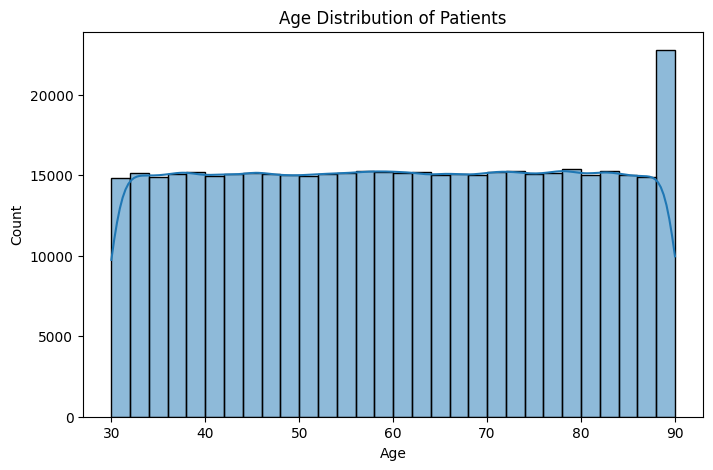

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

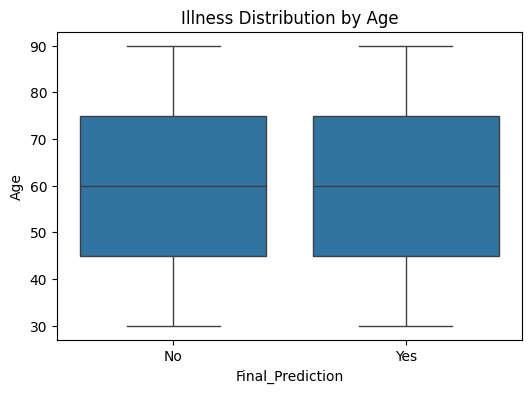

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Final_Prediction', y='Age', data=df)
plt.title('Illness Distribution by Age')
plt.show()

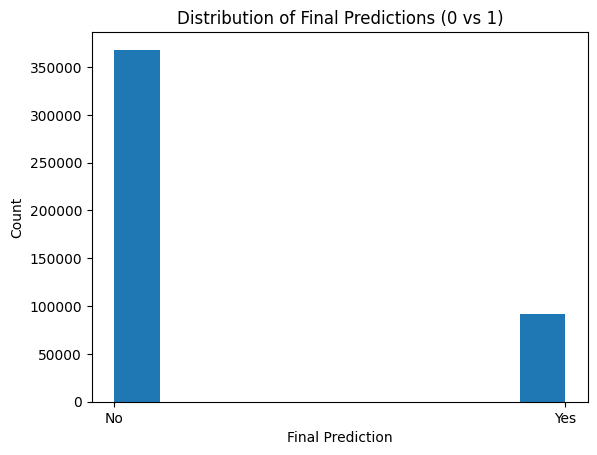

In [11]:
plt.hist(df['Final_Prediction'])
plt.xlabel("Final Prediction")
plt.ylabel("Count")
plt.title("Distribution of Final Predictions (0 vs 1)")
plt.show()

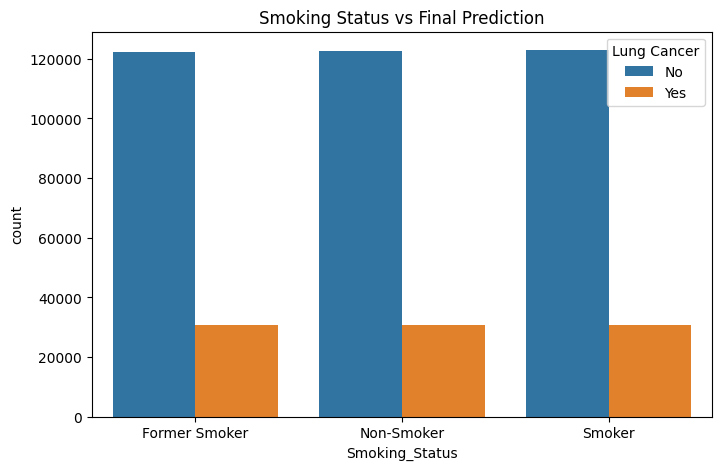

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Smoking_Status'], hue=df['Final_Prediction'])
plt.title('Smoking Status vs Final Prediction')
plt.legend(title='Lung Cancer', loc='upper right')
plt.show()

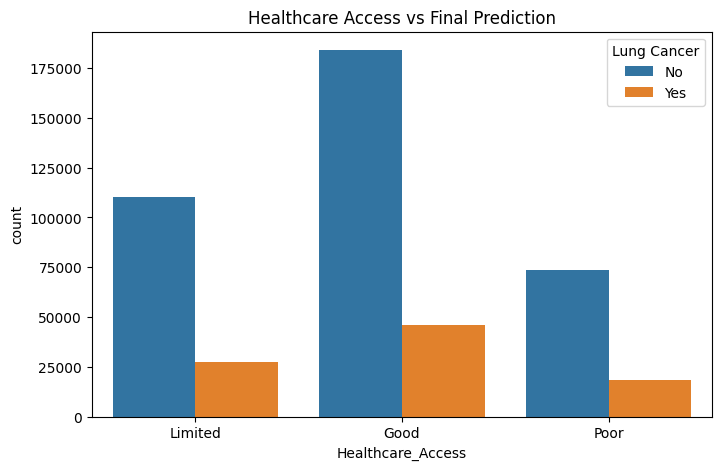

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Healthcare_Access'], hue=df['Final_Prediction'])
plt.title('Healthcare Access vs Final Prediction')
plt.legend(title='Lung Cancer', loc='upper right')
plt.show()

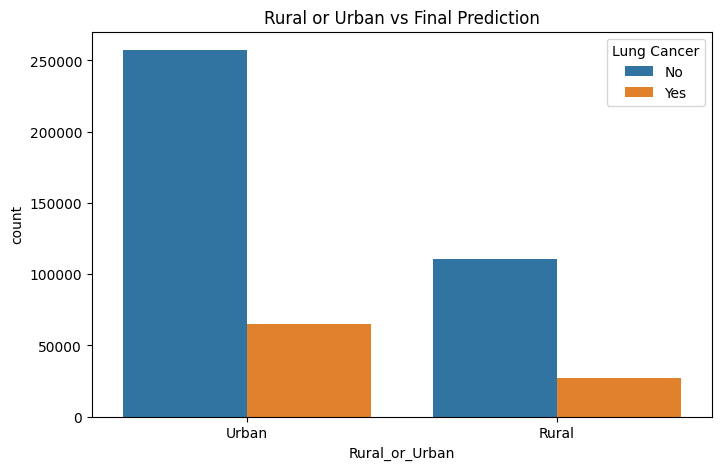

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Rural_or_Urban'], hue=df['Final_Prediction'])
plt.title('Rural or Urban vs Final Prediction')
plt.legend(title='Lung Cancer', loc='upper right')
plt.show()

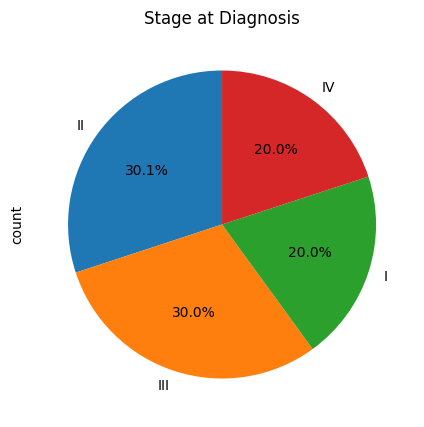

In [15]:
plt.figure(figsize=(8, 5))
df['Stage_at_Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Stage at Diagnosis')
plt.show()

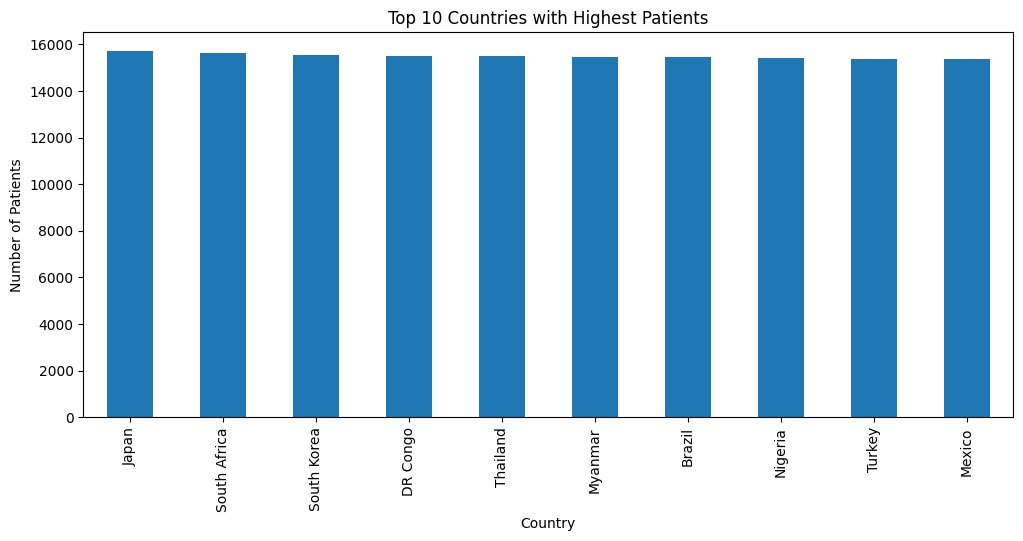

In [16]:
plt.figure(figsize=(12, 5))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries with Highest Patients')
# plt.xlim(14500, 16000)
plt.ylabel('Number of Patients')
plt.show()


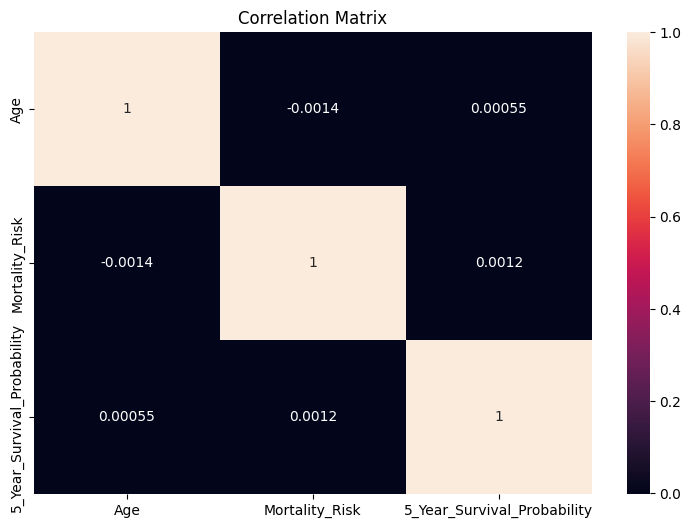

In [17]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Preprocessing and Model Building

In [18]:
from utils.pipeline import build_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [19]:
# Convert target variable to numeric values
le = LabelEncoder()
y = le.fit_transform(df['Final_Prediction'])

X = df.drop('Final_Prediction', axis=1)

X_train, X_data, y_train, y_data = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_data, y_data, stratify=y_data, test_size=0.2, random_state=42)


scores = {}

pipe = build_pipeline(X)

In [20]:
# Logistic Regression
reg_pipeline = pipe(LogisticRegression(max_iter=1000, random_state=42))

reg_pipeline.fit(X_train, y_train)
scores['Logistic Regression'] = reg_pipeline.score(X_test, y_test)

In [21]:
# KNN
knn_pipeline = pipe(KNeighborsClassifier(n_neighbors=5))
knn_pipeline.fit(X_train, y_train)
scores['KNN'] = knn_pipeline.score(X_test, y_test)

In [22]:
# Random Forest
rf_pipeline = pipe(RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced'))
rf_pipeline.fit(X_train, y_train)
scores['Random Forest'] = rf_pipeline.score(X_test, y_test)

In [23]:
# XGBoost
xgb_pipeline = pipe(XGBClassifier(n_estimators=100, max_depth=5, random_state=42))

xgb_pipeline.fit(X_train, y_train)
scores['XGBoost'] = xgb_pipeline.score(X_test, y_test)

In [24]:
# CatBoost
cat_pipeline = pipe(CatBoostClassifier(iterations=100, depth=5, random_state=42, verbose=False))
cat_pipeline.fit(X_train, y_train)
scores['CatBoost'] = cat_pipeline.score(X_test, y_test)

In [25]:
# LightGBM
lgbm_pipeline = pipe(LGBMClassifier(n_estimators=100, max_depth=5, random_state=42))
lgbm_pipeline.fit(X_train, y_train)
scores['LightGBM'] = lgbm_pipeline.score(X_test, y_test)

/Users/georgijhabner/Desktop/awesome-ml-pipeline/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 46093, number of negative: 184053
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 230146, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200277 -> initscore=-1.384563
[LightGBM] [Info] Start training from score -1.384563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/Users/georgijhabner/Desktop/awesome-ml-pipeline/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


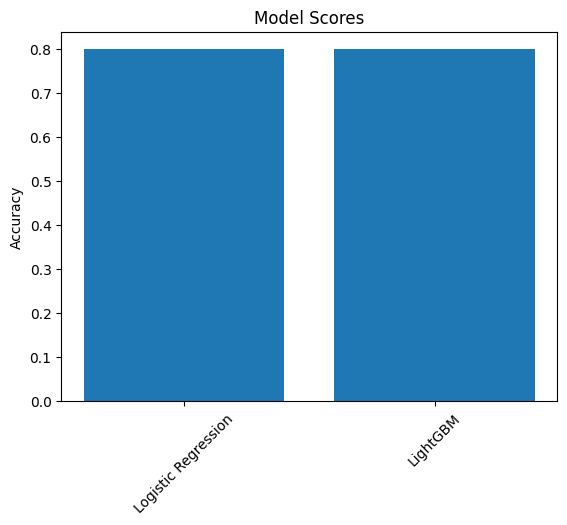

In [26]:
# Getting best two models
sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))
top_2_scores = dict(list(sorted_scores.items())[:2])
plt.bar(top_2_scores.keys(), top_2_scores.values())
plt.title('Model Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from utils.metrics import eval_classification
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import optuna

In [28]:
# Grid search for Random Forest
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Best ROC-AUC: {rf_grid.best_score_}")

eval_classification(rf_grid, X_test, y_test)


KeyboardInterrupt: 

Best Parameters: {'model__max_iter': 100}
Best ROC-AUC: 0.5008310979453038


/Users/georgijhabner/Desktop/awesome-ml-pipeline/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


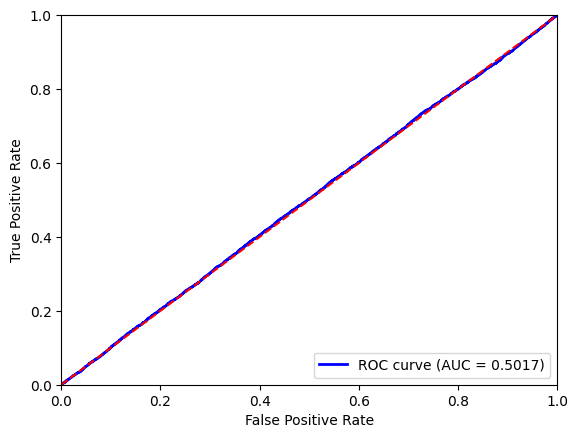

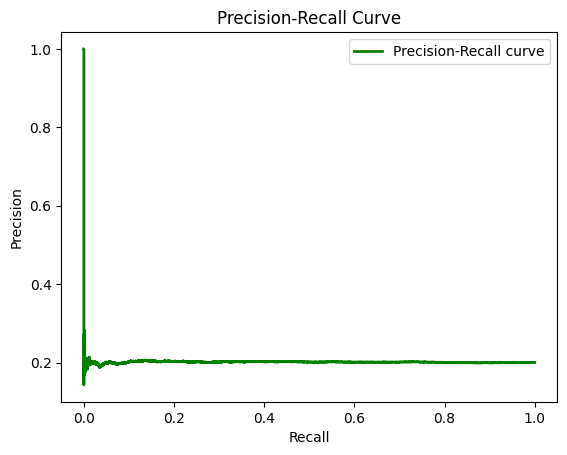


Classification Metrics:
Accuracy: 0.7997
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5017


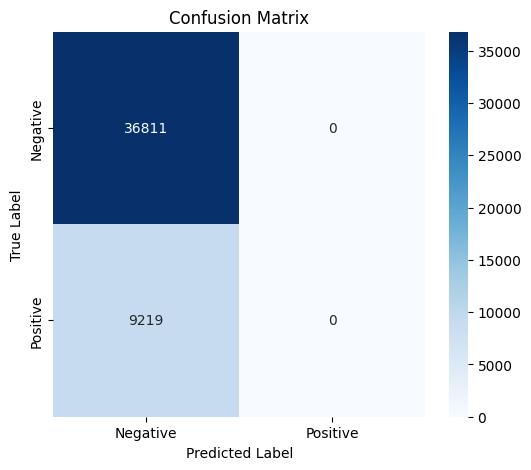

{'Accuracy': 0.7997175754942429,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1 Score': 0.0,
 'ROC-AUC': 0.5017363373484517}

In [29]:
# Grid search for Logistic Regression
reg_param_grid = {
    'model__max_iter': [100, 1000, 10000]
}

reg_grid = GridSearchCV(reg_pipeline, reg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
reg_grid.fit(X_train, y_train)

print(f"Best Parameters: {reg_grid.best_params_}")
print(f"Best ROC-AUC: {reg_grid.best_score_}")

eval_classification(reg_grid, X_test, y_test)

In [33]:
# Optuna for Random Forest
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 20)
    }

    model = pipe(RandomForestClassifier(**params , random_state=42))
    
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_test)[:, 1]  # Берем вероятности для AUC-ROC
    return roc_auc_score(y_test, y_pred)

study = optuna.create_study(direction="maximize")  # Максимизируем AUC-ROC
study.optimize(objective, n_trials=30)  # 30 итераций

[I 2025-03-05 18:01:14,479] A new study created in memory with name: no-name-db24f87e-63af-4f49-b690-f395e7e31f2e
[I 2025-03-05 18:02:37,845] Trial 0 finished with value: 0.49809244065801406 and parameters: {'n_estimators': 440, 'max_depth': 16}. Best is trial 0 with value: 0.49809244065801406.
[I 2025-03-05 18:03:21,905] Trial 1 finished with value: 0.49878244118780446 and parameters: {'n_estimators': 218, 'max_depth': 17}. Best is trial 1 with value: 0.49878244118780446.
[W 2025-03-05 18:03:40,105] Trial 2 failed with parameters: {'n_estimators': 363, 'max_depth': 16} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/georgijhabner/Desktop/awesome-ml-pipeline/.venv/lib/python3.9/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_43069/2761477935.py", line 10, in objective
    model.fit(X_train, y_train)
  File "/Users/

KeyboardInterrupt: 

In [30]:
# Optuna for Logistic Regression
def objective(trial):
    params = {
        "max_iter": trial.suggest_int("max_iter", 100, 10000)
    }

    model = pipe(LogisticRegression(**params, random_state=42))
    
    model.fit(X_train, y_train)
    # change to X_val, y_val
    y_pred = model.predict_proba(X_test)[:, 1]  # Берем вероятности для AUC-ROC
    return roc_auc_score(y_test, y_pred)

study = optuna.create_study(direction="maximize")  # Максимизируем AUC-ROC
study.optimize(objective, n_trials=30)  # 30 итераций


[I 2025-03-05 17:58:46,036] A new study created in memory with name: no-name-80d8e290-65c3-497f-a708-bb3f216aa582
[I 2025-03-05 17:58:48,090] Trial 0 finished with value: 0.5017363373484517 and parameters: {'max_iter': 2066}. Best is trial 0 with value: 0.5017363373484517.
[I 2025-03-05 17:58:50,145] Trial 1 finished with value: 0.5017363373484517 and parameters: {'max_iter': 7850}. Best is trial 0 with value: 0.5017363373484517.
[I 2025-03-05 17:58:52,911] Trial 2 finished with value: 0.5017363373484517 and parameters: {'max_iter': 7771}. Best is trial 0 with value: 0.5017363373484517.
[I 2025-03-05 17:58:55,144] Trial 3 finished with value: 0.5017363373484517 and parameters: {'max_iter': 9763}. Best is trial 0 with value: 0.5017363373484517.
[I 2025-03-05 17:58:57,184] Trial 4 finished with value: 0.5017363373484517 and parameters: {'max_iter': 4335}. Best is trial 0 with value: 0.5017363373484517.
[I 2025-03-05 17:58:59,217] Trial 5 finished with value: 0.5017363373484517 and parame

In [35]:
# Random Search for Random Forest
rf_param_grid = {
    'model__n_estimators': randint(50, 500),
    'model__max_depth': randint(3, 20)
}

random_search = RandomizedSearchCV(
    rf_pipeline, param_distributions=rf_param_grid, n_iter=30, cv=5,  verbose=2,
    random_state=42, scoring='roc_auc', n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best ROC-AUC: {random_search.best_score_}")

y_pred = random_search.best_estimator_.predict(X_test)
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
# Random Search for Regression
reg_param_grid = {
    'model__max_iter': randint(100, 10000)
}

random_search = RandomizedSearchCV(
    reg_pipeline, param_distributions=reg_param_grid, n_iter=30, cv=5, verbose=2,
    random_state=42, scoring='roc_auc', n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best ROC-AUC: {random_search.best_score_}")

y_pred = random_search.best_estimator_.predict(X_test)
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...............................model__max_iter=7370; total time=   1.9s
[CV] END ...............................model__max_iter=7370; total time=   2.1s
[CV] END ...............................model__max_iter=7370; total time=   2.1s
[CV] END ...............................model__max_iter=7370; total time=   2.2s
[CV] END ...............................model__max_iter=7370; total time=   2.1s
[CV] END ................................model__max_iter=960; total time=   2.1s
[CV] END ................................model__max_iter=960; total time=   2.0s
[CV] END ................................model__max_iter=960; total time=   2.1s
[CV] END ................................model__max_iter=960; total time=   2.2s
[CV] END ................................model__max_iter=960; total time=   2.3s
[CV] END ...............................model__max_iter=5490; total time=   2.5s
[CV] END ...............................model__

SHAP 

In [60]:
import shap

shap.initjs()

rf_model = rf_pipeline.named_steps['model']

X_train_preprocessed = rf_pipeline.named_steps['preprocessor'].transform(X_train)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_train_preprocessed)
